In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
df = pd.read_csv('FIFA_adjusted.csv')
df.head()

,run_on_adjusted,postal_code,day_cnt,all_cnt_adjusted,fifa_cnt_adjusted,F14,F14_adjusted,F13,F12,F11,...,F13_buy,F12_buy,F11_buy,F10_buy,F09_buy,recency_version,latest_3,PS3,PS4,PC
0,2014-07-03,17257,8,5,0,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,...,0,0,0,0,0,0,0,1,1,0
1,2014-07-03,60045,0,1,0,2000-01-01,2000-01-01,2013-02-26,2000-01-01,2000-01-01,...,13,0,0,0,0,13,1,0,0,0
2,2014-07-03,89146,0,3,0,2000-01-01,2000-01-01,2000-01-01,2012-02-10,2000-01-01,...,0,12,0,0,0,12,1,1,0,0
3,2014-07-03,55104,62,11,1,2014-01-30,2014-01-30,2000-01-01,2011-12-15,2000-01-01,...,0,12,0,0,0,14,2,0,0,0
4,2014-07-03,75126,0,4,1,2000-01-01,2000-01-01,2013-01-25,2011-11-28,2000-01-01,...,13,12,0,0,0,13,2,1,1,0


In [3]:

df['F14_buy'].replace({14: 1}, inplace=True)
df['F13_buy'].replace({13: 1}, inplace=True)
df['F12_buy'].replace({12: 1}, inplace=True)
df['F11_buy'].replace({11: 1}, inplace=True)
df['F10_buy'].replace({10: 1}, inplace=True)
df['F09_buy'].replace({9: 1}, inplace=True)

df['F10_buy'].value_counts()

0    532396
1     95652
Name: F10_buy, dtype: int64

In [4]:
#standardize the 'last_purchase_till_now' column
from sklearn.preprocessing import StandardScaler
df['Last_purchase_till_now'] = StandardScaler().fit_transform(df[['Last_purchase_till_now']])

In [5]:
df = pd.concat([df,pd.get_dummies(df['recency_version'], prefix='version')],axis=1)

In [6]:
df.head()

,run_on_adjusted,postal_code,day_cnt,all_cnt_adjusted,fifa_cnt_adjusted,F14,F14_adjusted,F13,F12,F11,...,PS3,PS4,PC,version_0,version_9,version_10,version_11,version_12,version_13,version_14
0,2014-07-03,17257,8,5,0,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,...,1,1,0,1,0,0,0,0,0,0
1,2014-07-03,60045,0,1,0,2000-01-01,2000-01-01,2013-02-26,2000-01-01,2000-01-01,...,0,0,0,0,0,0,0,0,1,0
2,2014-07-03,89146,0,3,0,2000-01-01,2000-01-01,2000-01-01,2012-02-10,2000-01-01,...,1,0,0,0,0,0,0,1,0,0
3,2014-07-03,55104,62,11,1,2014-01-30,2014-01-30,2000-01-01,2011-12-15,2000-01-01,...,0,0,0,0,0,0,0,0,0,1
4,2014-07-03,75126,0,4,1,2000-01-01,2000-01-01,2013-01-25,2011-11-28,2000-01-01,...,1,1,0,0,0,0,0,0,1,0


In [6]:
df.drop(['version_0'], axis=1)

,run_on_adjusted,postal_code,day_cnt,all_cnt_adjusted,fifa_cnt_adjusted,F14,F14_adjusted,F13,F12,F11,...,latest_3,PS3,PS4,PC,version_9,version_10,version_11,version_12,version_13,version_14
0,2014-07-03,17257,8,5,0,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,...,0,1,1,0,0,0,0,0,0,0
1,2014-07-03,60045,0,1,0,2000-01-01,2000-01-01,2013-02-26,2000-01-01,2000-01-01,...,1,0,0,0,0,0,0,0,1,0
2,2014-07-03,89146,0,3,0,2000-01-01,2000-01-01,2000-01-01,2012-02-10,2000-01-01,...,1,1,0,0,0,0,0,1,0,0
3,2014-07-03,55104,62,11,1,2014-01-30,2014-01-30,2000-01-01,2011-12-15,2000-01-01,...,2,0,0,0,0,0,0,0,0,1
4,2014-07-03,75126,0,4,1,2000-01-01,2000-01-01,2013-01-25,2011-11-28,2000-01-01,...,2,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628043,2014-07-03,94928,134,11,5,2013-10-09,2013-10-09,2012-09-26,2011-09-28,2010-09-29,...,3,0,0,0,0,0,0,0,0,1
628044,2014-07-03,11374,0,2,1,2000-01-01,2000-01-01,2012-09-25,2012-04-15,2000-01-01,...,2,0,0,1,0,0,0,0,1,0
628045,2014-07-03,33606,0,18,2,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2011-10-07,...,0,1,0,0,0,0,1,0,0,0
628046,2014-07-03,44070,11,7,2,2000-01-01,2000-01-01,2013-07-10,2013-07-08,2000-01-01,...,2,0,0,0,0,0,0,0,1,0


In [7]:
from sklearn.linear_model import LogisticRegression

feature_columns = ['Last_purchase_till_now','F14_buy','F13_buy','F12_buy','F11_buy','F10_buy','F09_buy','latest_3','PS3',
                   'PS4','PC','version_9','version_10','version_11','version_12','version_13','version_14']
X= df[feature_columns]
y= df['F15_buy']

In [10]:
?KFold

Object `KFold` not found.


In [9]:
#instead of using train_test split, kfold validation can be a better way to get approach to a better prediction
from sklearn.model_selection import cross_val_predict,KFold

In [10]:
from sklearn.model_selection import cross_val_predict,KFold # import KFold
lr= LogisticRegression(class_weight='balanced')
kf = KFold(n_splits=10,random_state = 666)
y_pred = cross_val_predict(lr,X,y,cv=kf)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [23]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X, y, cv=kf, scoring='accuracy')
print(lr_scores)

[0.74949447 0.7491601  0.75188281 0.75006767 0.74688321 0.74955816
 0.74971738 0.74874612 0.75001592 0.74883765]


In [24]:
print(lr_scores.mean())

0.7494363487836576


In [8]:
# Confusion_matrix in Scikit Learn 
from sklearn.metrics import confusion_matrix
# Precision_score in Scikit Learn
from sklearn.metrics import precision_score
# Recall in Scikit Learn
from sklearn.metrics import recall_score

In [14]:
y_pred = cross_val_predict(lr, X, y, cv=kf)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[295307 101907]
 [ 55459 175375]]


In [15]:
precision_score(y, y_pred),recall_score(y, y_pred)

(0.6324788482483537, 0.7597450982091026)

In [16]:
#Usually we want both the recall and precession as approach to 1 as possible. However, we know that as one of them
#goes up, the other score will always goes down. So we introduce F1_score to evaluate them as a whole.
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.6902951294586275

TRP and FRP came from Confusion Matrix Directly

| - | 0 | 1 |
| :-: | :-: | :-: |
| 0 | Predict Negative correctly TN(True Negative) |Predcit Positive falsely FP(False Positive) |
| 1 |Predict Negative falsely FN(False Negative) | Predict Positive Correctly TP(Ture Positive) |

$$
F P R=\frac{F P}{T N+F P}
$$

$$
T P R=\frac{T P}{T P+F N}
$$

Based on the equation, we can found that：
* TPR is actually recall rate. It measure the rate of 'predict 1' and 'actual 1' to the 'actual 1' data.
* FPR is acuually completely reversed to TPR. It measure the rate of 'predict 1' and 'actual 0' to the 'actual 0' data.

Lets Actually Visualize the ROC curve

In [17]:
lr.fit(X,y)
y_pred_prob = lr.predict_proba(X)[:,1]

In [18]:
print(y_pred_prob)

[0.87330088 0.25828042 0.10083585 ... 0.11224676 0.35403188 0.36913346]


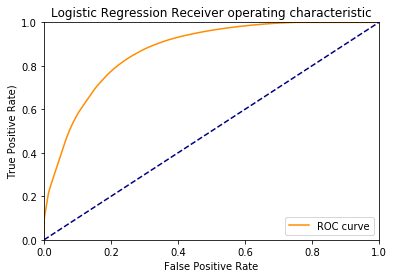

In [32]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
Roc_curve = plt.plot(fpr, tpr,color='darkorange',
         label='ROC curve') 
Random_guess = plt.plot([0, 1], [0, 1], color='navy',linestyle='--',)
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.title('Logistic Regression Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn import metrics
print (metrics.roc_auc_score(y, y_pred_prob))

0.8215672356536712


In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
kf = KFold(n_splits=10,random_state = 666)
y_pred_dt = cross_val_predict(dt_clf,X,y,cv=kf)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [36]:
dt_clf_scores = cross_val_score(dt_clf, X, y, cv=kf, scoring='accuracy')
print(dt_clf_scores)

[0.75124592 0.7501632  0.75035427 0.75279038 0.74860282 0.75349096
 0.75162806 0.74896903 0.75181517 0.75195847]


In [26]:
print(dt_clf_scores.mean())

0.7511639263574446


In [37]:
y_pred = cross_val_predict(dt_clf, X, y, cv=kf)
conf_mat = confusion_matrix(y, y_pred_dt)
print(conf_mat)

[[319703  77511]
 [ 78768 152066]]


In [38]:
precision_score(y, y_pred_dt),recall_score(y, y_pred_dt)

(0.6623747152371535, 0.6587677725118484)

In [48]:
f1_score(y, y_pred_dt)

0.6605663200922653

In [40]:
dt_clf.fit(X,y)
y_pred_prob_dt = dt_clf.predict_proba(X)[:,1]
print(y_pred_prob_dt)

[0.69989616 0.10204082 0.         ... 0.         0.5        0.        ]


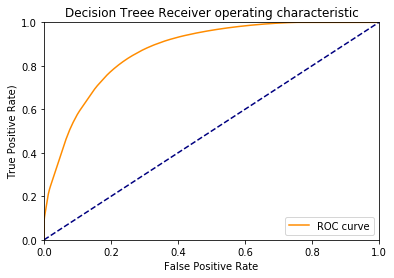

In [41]:
fpr, tpr, thresholds = roc_curve(y, y_pred_prob_dt)
Roc_curve = plt.plot(fpr, tpr,color='darkorange',
         label='ROC curve') 
Random_guess = plt.plot([0, 1], [0, 1], color='navy',linestyle='--',)
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.title('Decision Treee Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
print (metrics.roc_auc_score(y, y_pred_prob_dt))

0.8717678300980998


In [54]:
?VotingClassifier

In [52]:
from sklearn.ensemble import VotingClassifier


voting_clf = VotingClassifier(estimators=[
    ("lr", LogisticRegression(solver="liblinear")),
    ("dt_clf", DecisionTreeClassifier(random_state=666))
], voting="soft")

In [53]:
voting_clf_scores = cross_val_score(voting_clf, X, y, cv=kf, scoring='accuracy')
print(voting_clf_scores)

[0.75650028 0.75449407 0.75573601 0.75769445 0.75314067 0.75804474
 0.75586339 0.75435077 0.7560028  0.75558882]


In [55]:
print(voting_clf_scores.mean())

0.7557415995408301


In [56]:
y_pred_voting_clf = cross_val_predict(voting_clf, X, y, cv=kf)
conf_mat = confusion_matrix(y, y_pred_voting_clf)
print(conf_mat)

[[318965  78249]
 [ 75157 155677]]


In [50]:
f1_score(y,y_pred_voting_clf)

0.6547026730261126

In [57]:
voting_clf.fit(X,y)
y_pred_prob_voting_clf = voting_clf.predict_proba(X)[:,1]
print(y_pred_prob_voting_clf)

[0.74734016 0.13644482 0.0313017  ... 0.03452606 0.37248781 0.12280073]


In [58]:
print (metrics.roc_auc_score(y, y_pred_prob_voting_clf))

0.8603922855968984


In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_5 = RandomForestClassifier(n_estimators=5,min_samples_split=2, oob_score=True, random_state=666)

rf_clf_5.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=True, random_state=666, verbose=0,
                       warm_start=False)

In [80]:
from sklearn.metrics import accuracy_score
y_predict_rf_clf_5 = rf_clf_5.predict(X)
accuracy_rf_clf_5 = accuracy_score(y,y_predict_rf_clf)
print(accuracy_rf_clf_5)

0.78740796881767


In [73]:
conf_mat = confusion_matrix(y, y_predict_rf_clf_5)
print(conf_mat)

[[327403  69811]
 [ 63707 167127]]


In [77]:
precision_score(y, y_predict_rf_clf_5),recall_score(y, y_predict_rf_clf_5)

(0.7053617402020782, 0.7240137934619684)

In [74]:
f1_score(y,y_predict_rf_clf_5)

0.7145660706498037

In [81]:
rf_clf_5.fit(X,y)
y_pred_prob_rf_clf_5 = rf_clf_5.predict_proba(X)[:,1]
print(y_pred_prob_rf_clf_5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[0.70300005 0.11374527 0.         ... 0.         0.42611111 0.        ]


In [76]:
print (metrics.roc_auc_score(y, y_pred_prob_rf_clf_5))

0.862614176832413


In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_50 = RandomForestClassifier(n_estimators=50,min_samples_split=2, oob_score=True, random_state=666)

rf_clf_50.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=666, verbose=0,
                       warm_start=False)

In [83]:
y_predict_rf_clf_50 = rf_clf_50.predict(X)
accuracy_rf_clf_50 = accuracy_score(y,y_predict_rf_clf_50)
print(accuracy_rf_clf_50)

0.7921974116628029


In [84]:
conf_mat = confusion_matrix(y, y_predict_rf_clf_50)
print(conf_mat)

[[329829  67385]
 [ 63125 167709]]


In [85]:
precision_score(y, y_predict_rf_clf_50),recall_score(y, y_predict_rf_clf_50)

(0.713369971160472, 0.7265350858192468)

In [86]:
f1_score(y,y_predict_rf_clf_50)

0.7198923438814582

In [87]:
rf_clf_50.fit(X,y)
y_pred_prob_rf_clf_50 = rf_clf_50.predict_proba(X)[:,1]
print(y_pred_prob_rf_clf_50)

[0.70072017 0.10919814 0.         ... 0.         0.53398124 0.12      ]


In [88]:
print (metrics.roc_auc_score(y, y_pred_prob_rf_clf_50))

0.8675130593803722


In [89]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_500 = RandomForestClassifier(n_estimators=500,min_samples_split=2, oob_score=True, random_state=666)

rf_clf_500.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=666, verbose=0,
                       warm_start=False)

In [90]:
y_predict_rf_clf_500 = rf_clf_500.predict(X)
accuracy_rf_clf_500 = accuracy_score(y,y_predict_rf_clf_500)
print(accuracy_rf_clf_500)

0.7923454895167248


In [91]:
conf_mat = confusion_matrix(y, y_predict_rf_clf_500)
print(conf_mat)

[[330155  67059]
 [ 63358 167476]]


In [92]:
precision_score(y, y_predict_rf_clf_500),recall_score(y, y_predict_rf_clf_500)

(0.7140767902445264, 0.7255257024528449)

In [93]:
f1_score(y,y_predict_rf_clf_50)

0.7198923438814582

In [94]:
rf_clf_500.fit(X,y)
y_pred_prob_rf_clf_500 = rf_clf_500.predict_proba(X)[:,1]
print(y_pred_prob_rf_clf_500)

[0.700184   0.10115652 0.         ... 0.002      0.52445976 0.12      ]


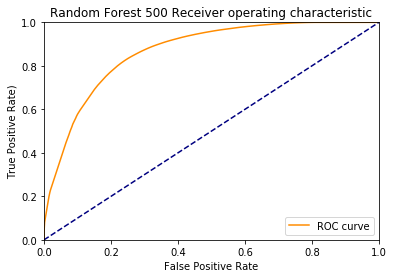

In [109]:
fpr, tpr, thresholds = roc_curve(y, y_pred_prob_rf_clf_500)
Roc_curve = plt.plot(fpr, tpr,color='darkorange',
         label='ROC curve') 
Random_guess = plt.plot([0, 1], [0, 1], color='navy',linestyle='--',)
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.title('Random Forest 500 Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [95]:
print (metrics.roc_auc_score(y, y_pred_prob_rf_clf_500))

0.8680074195839063


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=50)

In [98]:
?AdaBoostClassifier

In [99]:
kf = KFold(n_splits=10,random_state = 666)
y_pred_ada_clf = cross_val_predict(ada_clf,X,y,cv=kf)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [100]:
ada_clf_scores = cross_val_score(ada_clf, X, y, cv=kf, scoring='accuracy')
print(ada_clf_scores)

[0.76535308 0.76364939 0.76430221 0.76688162 0.76250299 0.76540084
 0.76458881 0.7612292  0.76276989 0.76286542]


In [101]:
print(ada_clf_scores.mean())

0.7639543438186607


In [102]:
conf_mat = confusion_matrix(y, y_pred_ada_clf)
print(conf_mat)

[[326655  70559]
 [ 77689 153145]]


In [103]:
precision_score(y, y_pred_ada_clf),recall_score(y, y_pred_ada_clf)

(0.6845876694203054, 0.6634421272429538)

In [104]:
f1_score(y,y_pred_ada_clf)

0.6738490511244384

In [105]:
ada_clf.fit(X,y)
y_pred_prob_ada_clf = ada_clf.predict_proba(X)[:,1]
print(y_pred_prob_ada_clf)

[0.50468042 0.49015056 0.48490465 ... 0.48340359 0.4913755  0.49682428]


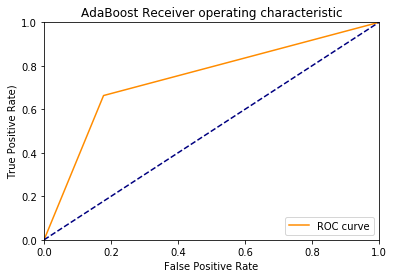

In [106]:
fpr, tpr, thresholds = roc_curve(y, y_pred_ada_clf)
Roc_curve = plt.plot(fpr, tpr,color='darkorange',
         label='ROC curve') 
Random_guess = plt.plot([0, 1], [0, 1], color='navy',linestyle='--',)
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.title('AdaBoost Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [107]:
print (metrics.roc_auc_score(y, y_pred_prob_ada_clf))

0.8272977609937486


Lets try xgboost as well

In [37]:
?XGBClassifier


In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
xgb_clf = XGBClassifier(max_depth=2, n_estimators=100)


In [15]:
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [17]:
from sklearn.metrics import accuracy_score


In [19]:
y_predict_xbg_clf_train = xgb_clf.predict(X_train)
y_predict_xbg_clf_test = xgb_clf.predict(X_test)

accuracy_xbg_clf_train = accuracy_score(y_train,y_predict_xgb_clf_train)
accuracy_xbg_clf_test = accuracy_score(y_test,y_predict_xgb_clf_test)
print(accuracy_xgb_clf_train)
print(accuracy_xgb_clf_test)


0.7636902463587547
0.7646126900724465


In [22]:
conf_mat = confusion_matrix(y_train, y_predict_xgb_clf_train)
print(conf_mat)

[[260134  57737]
 [ 60994 123573]]


In [24]:
precision_score(y_train, y_predict_xgb_clf_train),recall_score(y_train, y_predict_xbg_clf_train)


(0.6815564502785285, 0.6695292224503838)

In [25]:
y_pred_prob_xgb_clf = xgb_clf.predict_proba(X_train)[:,1]
print(y_pred_prob_xgb_clf)


[0.4715874  0.27307004 0.55644614 ... 0.324201   0.69248885 0.30586097]


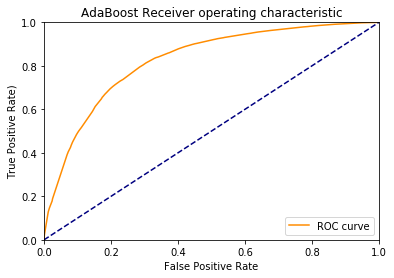

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob_xgb_clf)
Roc_curve = plt.plot(fpr, tpr,color='darkorange',
         label='ROC curve') 
Random_guess = plt.plot([0, 1], [0, 1], color='navy',linestyle='--',)
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.title('AdaBoost Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn import metrics
print (metrics.roc_auc_score(y_train, y_pred_prob_xbg_clf))

0.8247384085267703


LETS TRY XGBOOST 500

In [31]:
xbg_clf_500 = XGBClassifier(max_depth=2, n_estimators=500)


In [32]:
xbg_clf_500.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
y_predict_xbg_clf_500_train = xbg_clf_500.predict(X_train)
y_predict_xbg_clf_500_test = xbg_clf_500.predict(X_test)

accuracy_xbg_clf_500_train = accuracy_score(y_train,y_predict_xbg_clf_500_train)
accuracy_xbg_clf_500_test = accuracy_score(y_test,y_predict_xbg_clf_500_test)
print(accuracy_xbg_clf_500_train)
print(accuracy_xbg_clf_500_test)

0.7644565100569622
0.7655441445744765


In [34]:
y_pred_prob_xbg_clf_500 = xbg_clf_500.predict_proba(X_train)[:,1]
print(y_pred_prob_xbg_clf_500)

[0.4362182  0.22032675 0.5784944  ... 0.270048   0.6705851  0.29553515]


In [35]:
print (metrics.roc_auc_score(y_train, y_pred_prob_xbg_clf_500))

0.8274702144121442


## Instead of manually choosing hyper-parameter, we can also use grid search and to let the algorithm fine-tune the hyper-parameter for us.
Lets try to finetune random forest first

In [24]:
?RandomForestClassifier

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [11]:
from sklearn.ensemble import RandomForestClassifier


rf_clf_50 = RandomForestClassifier(n_estimators=50,min_samples_split=2, oob_score=True, random_state=666)

rf_clf_50.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=666, verbose=0,
                       warm_start=False)

In [12]:
# Initialize the best score
best_score = 0.0
# set the best  to -1
best_max_features = 0



# Overviewing the max features
for k in range(1,18):
    rf_clf_50 = RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=k, oob_score=True, random_state=666)
    rf_clf_50.fit(X_train, y_train)
    score = rf_clf_50.score(X_train,y_test)
    # If we can find a better score then the last run, we will update our score and update our max feature
    if score > best_score:
        best_max_features = k
        best_score = score

        
best_max_features,best_score

(17, 0.7922690622372812)

Before we use loop to find out the best hyper parameter, lets use PCA to reduce the feature dimension. Otherwise, the computation will be extremely slow

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [78]:
#Based on the ratio below, bigger ratio means higher explanation power on the overall dataset
#and it accounts for larger proportion of virance of the whole dataset.
pca.explained_variance_ratio_

array([3.44900957e-01, 2.47120756e-01, 1.03129517e-01, 7.27361997e-02,
       6.28118350e-02, 3.99461436e-02, 3.33336139e-02, 2.94835322e-02,
       2.19173701e-02, 1.72516529e-02, 8.93239933e-03, 7.15499731e-03,
       6.31708136e-03, 3.95499900e-03, 1.00894566e-03, 1.20385850e-29,
       9.00374309e-31])

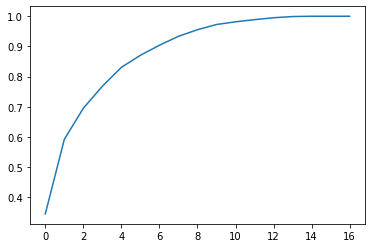

In [79]:
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

#### If we want to keep 95% of the overall features

In [80]:
pca = PCA(0.9)
pca.fit(X_train)
pca.n_components_  
#If we reduce the feature dimensions from 16 to 7, we can still maintain 90% of the information 

7

In [81]:
pca = PCA(0.95)
pca.fit(X_train)
pca.n_components_ 
#If we reduce the feature dimensions from 16 to 9, we can still maintain 95% of the information 

9

In [21]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [23]:
print(X_train_reduction.shape,y_train.shape)

(502438, 9) (502438,)


## Lets try grid search on XgBoost

In [67]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,KFold # import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV   #Perforing grid search
from sklearn import metrics





In [47]:
?XGBClassifier

In [42]:
#set up a timer
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [46]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.05, 0.1]
        }

In [55]:
xgb100 = XGBClassifier(n_estimators=100, objective='binary:logistic',
                    verbosity=2)

In [53]:
?KFold

In [54]:
folds = 5
param_comb = 10
kf = KFold(n_splits=folds,shuffle=True,random_state = 666)


In [56]:
?RandomizedSearchCV

In [59]:
random_search = RandomizedSearchCV(xgb100, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=kf.split(X,y), verbose=3, random_state=666 )

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 29.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 63.2min finished


[01:48:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[01:48:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[01:48:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[01:48:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[01:48:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[01:48:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[01:48:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[01:48:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[01:48:22] INFO: src/tree/updater_prune.cc:74: tree prun

[01:49:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 8 pruned nodes, max_depth=5
[01:49:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 18 pruned nodes, max_depth=5
[01:49:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 6 pruned nodes, max_depth=5
[01:49:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 4 pruned nodes, max_depth=5
[01:49:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 10 pruned nodes, max_depth=5
[01:49:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 8 pruned nodes, max_depth=5
[01:49:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=5
[01:49:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[01:49:29] INFO: src/tree/updater_prune.cc:74: tree pr

In [60]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb100-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([65.15465174, 53.82915711, 69.4050478 , 56.17476382, 77.41758804,
       39.95846877, 51.99841695, 49.8797606 , 49.70341816, 56.00278888,
       75.79109683, 59.07677846, 52.65034904, 56.74214101, 54.63634424,
       69.04273186, 50.76300535, 56.96499448, 46.72297702, 52.9257338 ,
       53.35862556, 67.51121941, 66.19086838, 63.30148087, 55.17448926,
       66.17834873, 69.27911644, 69.37713208, 47.00295177, 53.71732979,
       73.10871816, 60.62398086, 60.27996612, 56.89412098, 50.70765514,
       93.39374094, 54.9040844 , 58.12229033, 49.94405274, 53.98758826,
       44.08115492, 59.44847431, 66.10002089, 62.15734811, 72.27385921,
       62.34168983, 81.53706956, 73.22014351, 52.21942821, 52.9702106 ]), 'std_fit_time': array([0.53685947, 0.40549117, 0.49052642, 0.92817947, 1.00255905,
       0.2015546 , 3.20940685, 1.32748653, 0.90553575, 1.52404517,
       2.08968552, 0.35531533, 0.15936372, 0.29024743, 0.95591181,
       1.65359998, 0.9570668

### This is the result we only using default xgb100

In [63]:

y_pred_xgb100 = cross_val_predict(xgb100,X,y,cv=kf)
accuracy_xgb100 = accuracy_score(y,y_pred_xgb100)
print(accuracy_xgb100)


[12:34:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:34:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:34:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:34:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:34:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:34:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:34:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:34:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:34:47] INFO: src/tree/updater_prune.cc:74: tree prun

[12:35:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:20] INFO: src/tree/updater_prune.cc:74: tree prun

[12:35:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:35:55] INFO: src/tree/updater_prune.cc:74: tree prun

[12:36:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:36:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:36:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:36:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:36:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:36:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:36:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:36:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:36:30] INFO: src/tree/updater_prune.cc:74: tree prun

[12:36:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:37:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:03] INFO: src/tree/updater_prune.cc:74: tree prun

[12:37:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:37:38] INFO: src/tree/updater_prune.cc:74: tree prun

[12:38:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:13] INFO: src/tree/updater_prune.cc:74: tree prun

[12:38:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[12:38:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:38:47] INFO: src/tree/updater_prune.cc:74: tree pruni

In [65]:
xgb100.fit(X,y)
y_pred_prob_xgb100 = xgb100.predict_proba(X)[:,1]
print(y_pred_prob_xgb100)

[12:43:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:09] INFO: src/tree/updater_prune.cc:74: tree prun

[12:43:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[12:43:52] INFO: src/tree/updater_prune.cc:74: tree prun

In [69]:
print (metrics.roc_auc_score(y, y_pred_prob_xgb100))

0.8275094970323367


### This is the result after we apply randomizedsearchcv


In [70]:
y_pred_xgb100_adjusted = random_search.predict(X)
accuracy_xgb100_adjusted = accuracy_score(y,y_pred_xgb100_adjusted)
print(accuracy_xgb100_adjusted)

0.7661118258477059


In [71]:
y_pred_prob_xgb100_adjusted = random_search.predict_proba(X)[:,1]
print(y_pred_prob_xgb100_adjusted)

[0.697498   0.1243216  0.04816808 ... 0.04340591 0.17318888 0.32033694]


In [72]:
print (metrics.roc_auc_score(y, y_pred_prob_xgb100_adjusted))

0.8292103122421313


#### Lets retrain the model by feeding the model with already fine-tuned hyperparameter and increase the estimator

Based on the previous Randomized Search.Here are some of our best hyperparameter:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 1.0}

In [73]:
?XGBClassifier

In [75]:
xgb300 = XGBClassifier(n_estimators=300, objective='binary:logistic',subsample=1.0, min_child_weight= 5, max_depth=5, learning_rate = 0.1, gamma= 2, colsample_bytree= 1.0,
                    verbosity=1)

In [76]:
y_pred_xgb300 = cross_val_predict(xgb300,X,y,cv=kf)
accuracy_xgb300 = accuracy_score(y,y_pred_xgb300)
print(accuracy_xgb300)


0.7654351259776323


#### Lets apply PCA and try 500 estimator on XGBOOST

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X.shape[1])
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [83]:
pca = PCA(0.95)
pca.fit(X)
pca.n_components_  #We will only keep 9 features.

9

In [85]:
X_reduction = pca.transform(X)

In [84]:
xgb500 = XGBClassifier(n_estimators=500, objective='binary:logistic',subsample=1.0, min_child_weight= 5, max_depth=5, learning_rate = 0.1, gamma= 2, colsample_bytree= 1.0,
                    verbosity=1)

In [87]:
y_pred_xgb500 = cross_val_predict(xgb500,X_reduction,y,cv=kf)
accuracy_xgb500 = accuracy_score(y,y_pred_xgb500)
print(accuracy_xgb500)

0.7651294168598578


In [91]:
xgb500.fit(X_reduction,y)
y_pred_prob_xgb500_adjusted = xgb500.predict_proba(X_reduction)[:,1]
print(y_pred_prob_xgb500_adjusted)

[0.70141476 0.1188458  0.04287468 ... 0.04752172 0.17199549 0.3062497 ]


In [92]:
print (metrics.roc_auc_score(y, y_pred_prob_xgb500_adjusted))

0.8312786254184008


#### Lets try 1000 estimator

In [93]:
start_time = timer(None) # timing starts from this point for "start_time" variable
xgb1000 = XGBClassifier(n_estimators=1000, objective='binary:logistic',subsample=1.0, min_child_weight= 5, max_depth=5, learning_rate = 0.1, gamma= 2, colsample_bytree= 1.0,
                    verbosity=1)
xgb1000.fit(X_reduction, y)
timer(start_time)  # timing ends here for "start_time" variable



 Time taken: 1 hours 48 minutes and 2.04 seconds.


In [96]:
y_pred_xgb1000_adjusted = xgb1000.predict(X_reduction)
accuracy_xgb1000_adjusted = accuracy_score(y,y_pred_xgb1000_adjusted)
print(accuracy_xgb1000_adjusted)

0.7671865844648816


In [98]:
y_pred_prob_xgb1000_adjusted = xgb1000.predict_proba(X_reduction)[:,1]
print(y_pred_prob_xgb1000_adjusted)

[0.70141476 0.1188458  0.04287468 ... 0.04752172 0.17199549 0.3062497 ]


In [99]:
print (metrics.roc_auc_score(y, y_pred_prob_xgb1000_adjusted))

0.8312786254184008
